**EE-411 Homework 2 : Classifying digits & learning theory**

*Name : Palmisano*

*First Name : Fabio Nicola Edouard*

*Sciper = 296708*


**Part 1 : Classifying digits with Scikit-learn**

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC




In [3]:
#In order to don't have a lot of warning that make our code very unreadable we use the ignore of convergence warnings
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

*1) Import and prepare the data :*

In [4]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

We did the loading of the data as describe in the homework description, and now we will just check the sape of the data (X) that we obtain and the labels (y)

In [5]:
print('The shape of the data (X) that we receive is :', X.shape)
print('The shape of the data (y) that we receive is :', y.shape)

The shape of the data (X) that we receive is : (1797, 64)
The shape of the data (y) that we receive is : (1797,)


<Figure size 640x480 with 0 Axes>

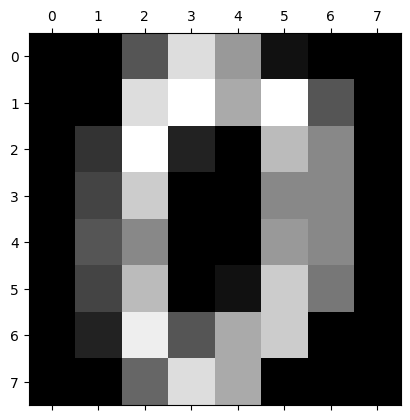

In [6]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [7]:
print(y)

[0 1 2 ... 8 9 8]


In [8]:
for i in range(len(y)): 
    if y[i] % 2 == 0 : 
        y[i] = 0
    else : 
        y[i] = 1

print(y)

[0 1 0 ... 0 1 0]


In [9]:
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size = 0.3, train_size = 0.7)

In [10]:
print('the size of train set is : ',x_train.shape)
print('the size of test set is : ', x_test.shape)

the size of train set is :  (1257, 64)
the size of test set is :  (540, 64)


In [11]:
print(f'The proportion of even number (0) in train set is is {(np.sum(y_train)/len(y_train))*100:.2f} %')
print(f'The proportion of odd number (1) in train set is is {(1-(np.sum(y_train)/len(y_train)))*100:.2f} %')


print('\n')

print(f'The proportion of even number (0) in test set is is {(np.sum(y_test)/len(y_test))*100:.2f} %')
print(f'The proportion of odd number (1) in test set is is {(1-(np.sum(y_test)/len(y_test)))*100:.2f} %')

The proportion of even number (0) in train set is is 50.84 %
The proportion of odd number (1) in train set is is 49.16 %


The proportion of even number (0) in test set is is 49.44 %
The proportion of odd number (1) in test set is is 50.56 %


We see that the both subsets have roughly the same proportion of labelled numbers.

We will here try to make a little bit preprocessing in order to obtain better results in accuracy

In [12]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**---------------------------------------------------EXO 1.2 -------------------------------------------------------------**

*2) Logistic Regression*

In [13]:
#LogReg with penalty l1
nbre_step = 50 
log_reg_l1 = LogisticRegression(penalty = 'l1',solver = 'liblinear')

parameters_logregl1 = {'C' :  1/np.logspace(-1,4,nbre_step)}

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_logregl1 = GridSearchCV(log_reg_l1, parameters_logregl1, scoring = 'accuracy', cv = folds, return_train_score = True)
grid_result = cv_logregl1.fit(x_train, y_train)

cvopt_logregl1 = cv_logregl1.best_estimator_
cvopt_logregl1.fit(x_train,y_train)

accuracy_logregl1 = cvopt_logregl1.score(x_test, y_test)



#LogReg with penalty l2
log_reg_l2 = LogisticRegression(penalty = 'l2',solver = 'liblinear')

parameters_logregl2 = {'C' :  1/np.logspace(-1,4,nbre_step)}

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_logregl2 = GridSearchCV(log_reg_l2, parameters_logregl2, scoring = 'accuracy', cv = folds, return_train_score = True)
cv_logregl2.fit(x_train, y_train)

cvopt_logregl2 = cv_logregl2.best_estimator_
cvopt_logregl2.fit(x_train,y_train)

accuracy_logregl2 = cvopt_logregl2.score(x_test, y_test)


print(cvopt_logregl1)
print(f"The accuracy on the Test set is : {accuracy_logregl1*100:.5f}%")
print('\n')
print(cvopt_logregl2)
print(f"The accuracy on the Test set is : {accuracy_logregl2*100:.5f}%")


LogisticRegression(C=0.47148663634573945, penalty='l1', solver='liblinear')
The accuracy on the Test set is : 91.11111%


LogisticRegression(C=0.14563484775012436, solver='liblinear')
The accuracy on the Test set is : 91.29630%


I just want to mention that without preprocess of the data we had previously accuracy on test set of $90,93 \%$ for l1 regression and $90,55 \%$ for l2 regression and we see there that we obtain a nice improvement 

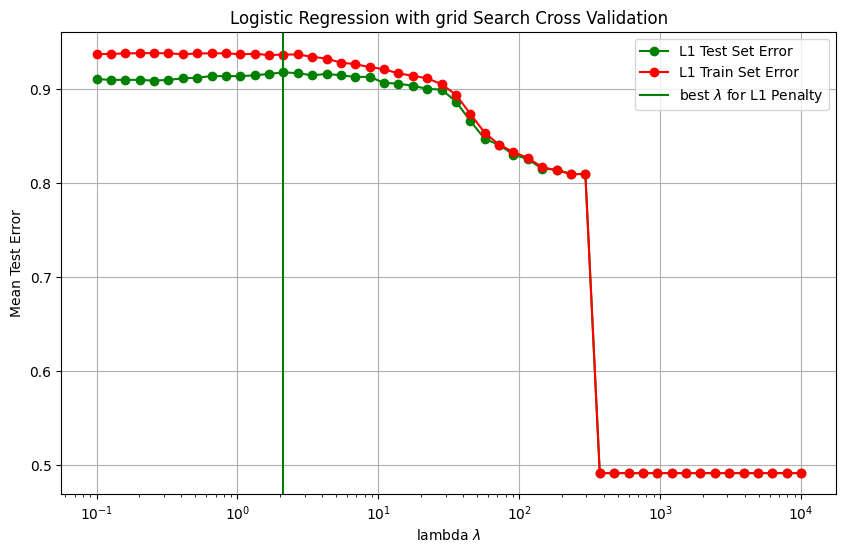

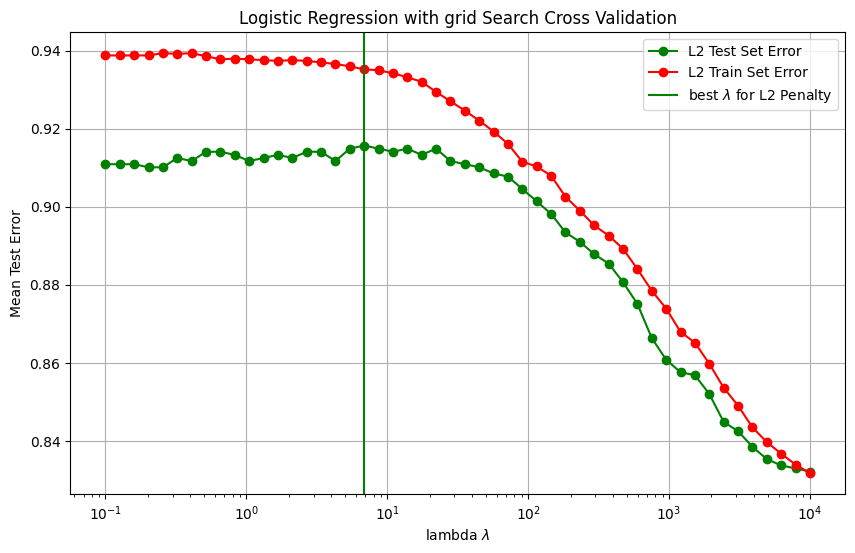

In [14]:
mean_test_l1 = cv_logregl1.cv_results_['mean_test_score']
mean_train_l1 = grid_result.cv_results_['mean_train_score']
mean_test_l2 = cv_logregl2.cv_results_['mean_test_score']
mean_train_l2 = cv_logregl2.cv_results_['mean_train_score']

lambda_ = np.logspace(-1,4,nbre_step)
plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_test_l1, label='L1 Test Set Error', color = 'green', marker = 'o')
plt.semilogx(lambda_, mean_train_l1, label='L1 Train Set Error', color = 'red', marker = 'o')
plt.axvline(1/cv_logregl1.best_params_['C'], color = 'green', label = 'best $\lambda$ for L1 Penalty')
plt.xlabel('lambda $\lambda$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Logistic Regression with grid Search Cross Validation')
plt.grid()
plt.show()

plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_test_l2, label='L2 Test Set Error',  color = 'green', marker = 'o')
plt.semilogx(lambda_, mean_train_l2, label='L2 Train Set Error',  color = 'red', marker = 'o')
plt.axvline(1/cv_logregl2.best_params_['C'], color = 'green', label = 'best $\lambda$ for L2 Penalty')
plt.xlabel('lambda $\lambda$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Logistic Regression with grid Search Cross Validation')
plt.grid()
plt.show()


**---------------------------------------------------EXO 1.3 -------------------------------------------------------------**

*3) Ridge Regression + SVM*

In [15]:

nbre_step = 50 
ridge = RidgeClassifier()

# Checking the documentation we have alpha = 1/(2C) but we know that C = 1/lambda so lambda = 2*alpha and we want ALPHA = LAMBDA/2

parameters_ridge = {'alpha' :  np.logspace(1,7,nbre_step)/2}

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_ridge = GridSearchCV(ridge, parameters_ridge, scoring = 'accuracy', cv = folds, return_train_score = True)
cv_ridge.fit(x_train, y_train)

cvopt_ridge= cv_ridge.best_estimator_
cvopt_ridge.fit(x_train,y_train)

accuracy_ridge = cvopt_ridge.score(x_test, y_test)

print(cvopt_ridge)
print(f"The accuracy on the Test set is : {accuracy_ridge*100:.5f}%")
print('\n')

RidgeClassifier(alpha=83.84164684055041)
The accuracy on the Test set is : 89.25926%




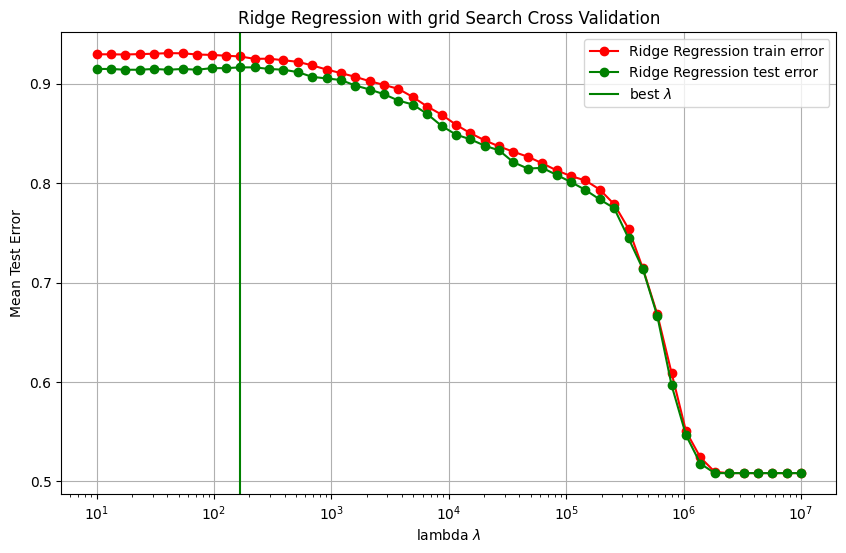

In [16]:
mean_test_ridge = cv_ridge.cv_results_['mean_test_score']
mean_train_ridge = cv_ridge.cv_results_['mean_train_score']

lambda_ = np.logspace(1,7,nbre_step)
plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_train_ridge, label='Ridge Regression train error', color = 'red', marker = 'o')
plt.semilogx(lambda_, mean_test_ridge, label='Ridge Regression test error', color = 'green', marker = 'o')
plt.axvline(2*cv_ridge.best_params_['alpha'], color = 'green', label = 'best $\lambda$ ')
plt.xlabel('lambda $\lambda$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Ridge Regression with grid Search Cross Validation')
plt.grid()
plt.show()

In [17]:

nbre_step = 50 
SVM = LinearSVC(loss = 'hinge') #take max_iter really big in order to don't have warning of convergence

# Checking the documentation we have C = 1/(lambda) 

parameters_SVM = {'C' :  1/np.logspace(0,4,nbre_step)}

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_SVM = GridSearchCV(SVM, parameters_SVM, scoring = 'accuracy', cv = folds, return_train_score = True)
cv_SVM.fit(x_train, y_train)

cvopt_SVM= cv_SVM.best_estimator_
cvopt_SVM.fit(x_train,y_train)

accuracy_SVM = cvopt_SVM.score(x_test, y_test)

print(cvopt_SVM)
print(f"The accuracy on the Test set is : {accuracy_SVM*100:.5f}%")


LinearSVC(C=0.01599858719606059, loss='hinge')
The accuracy on the Test set is : 90.92593%


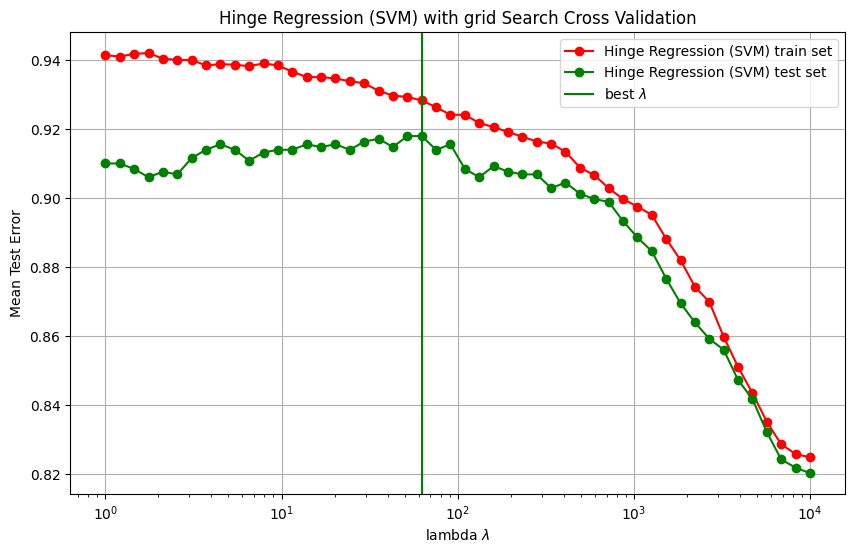

In [18]:
mean_test_SVM = cv_SVM.cv_results_['mean_test_score']
mean_train_SVM = cv_SVM.cv_results_['mean_train_score']

lambda_ = np.logspace(0,4,nbre_step)
plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_train_SVM, label='Hinge Regression (SVM) train set', color = 'red', marker = 'o')
plt.semilogx(lambda_, mean_test_SVM, label='Hinge Regression (SVM) test set', color = 'green', marker = 'o')
plt.axvline(1/cv_SVM.best_params_['C'], color = 'green', label = 'best $\lambda$ ')
plt.xlabel('lambda $\lambda$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Hinge Regression (SVM) with grid Search Cross Validation')
plt.grid()
plt.show()

**---------------------------------------------------EXO 1.4 -------------------------------------------------------------**

*4) Random Forest*

In [19]:
nbre_step = 20
RandomForest = RandomForestClassifier(max_depth = 10, min_samples_split = 10)


para_RF ={'n_estimators' : np.logspace(1,4,nbre_step).astype(int)}

folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
cv_RF = GridSearchCV(RandomForest, para_RF, cv = folds,  return_train_score = True)
cv_RF.fit(x_train, y_train)

cvopt_RF= cv_RF.best_estimator_
cvopt_RF.fit(x_train,y_train)

accuracy_RF = cvopt_RF.score(x_test, y_test)

print(cvopt_RF)
print(f"The accuracy on the Test set is : {accuracy_RF*100:.5f}%")


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=61)
The accuracy on the Test set is : 96.48148%


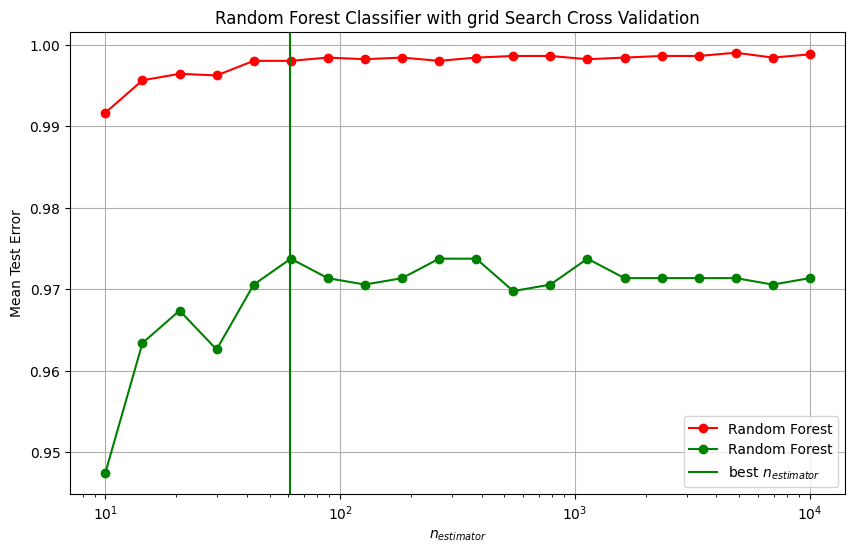

In [20]:
mean_test_RF = cv_RF.cv_results_['mean_test_score']
mean_train_RF = cv_RF.cv_results_['mean_train_score']
lambda_ = np.logspace(1,4,nbre_step)
plt.figure(figsize= (10,6))
plt.semilogx(lambda_, mean_train_RF, label='Random Forest', color = 'red', marker = 'o')
plt.semilogx(lambda_, mean_test_RF, label='Random Forest', color = 'green', marker = 'o')
plt.axvline(cv_RF.best_params_['n_estimators'], color = 'green', label = 'best $n_{estimator}$ ')
plt.xlabel('$n_{estimator}$')
plt.ylabel('Mean Test Error')
plt.legend()
plt.title('Random Forest Classifier with grid Search Cross Validation')
plt.grid()
plt.show()

**---------------------------------------------------EXO 1.5 -------------------------------------------------------------**

*5) Random Feature*

In [21]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

LogisticRegression(C=145634.84775012443, solver='liblinear')
The accuracy on the Test set is : 93.88889%


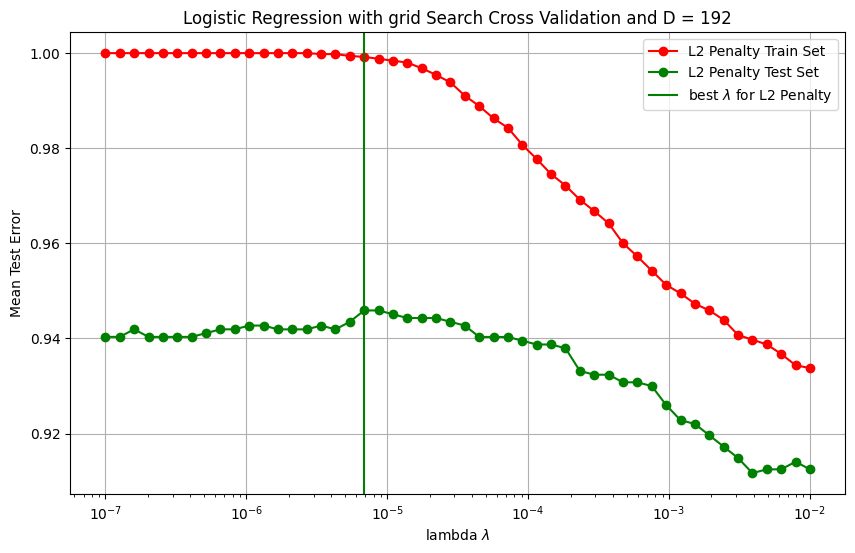

LogisticRegression(C=1930697.7288832497, solver='liblinear')
The accuracy on the Test set is : 93.70370%


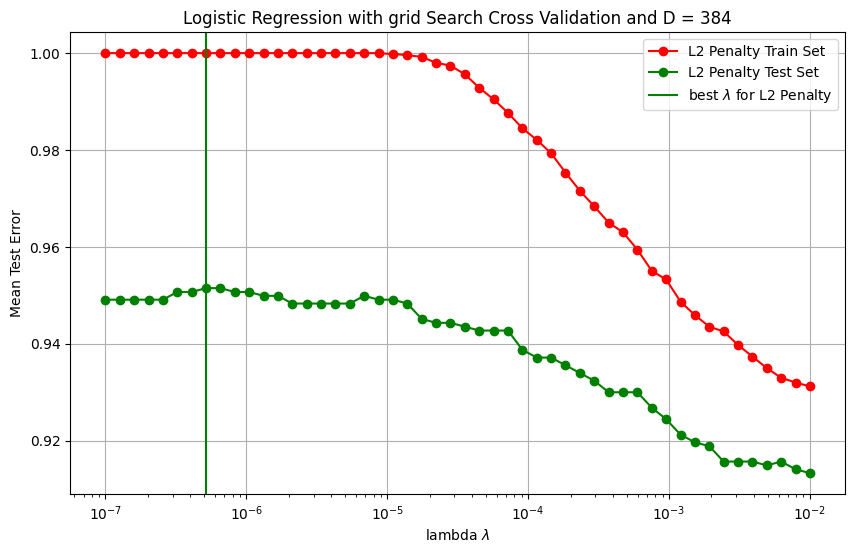

LogisticRegression(C=184206.99693267164, solver='liblinear')
The accuracy on the Test set is : 95.55556%


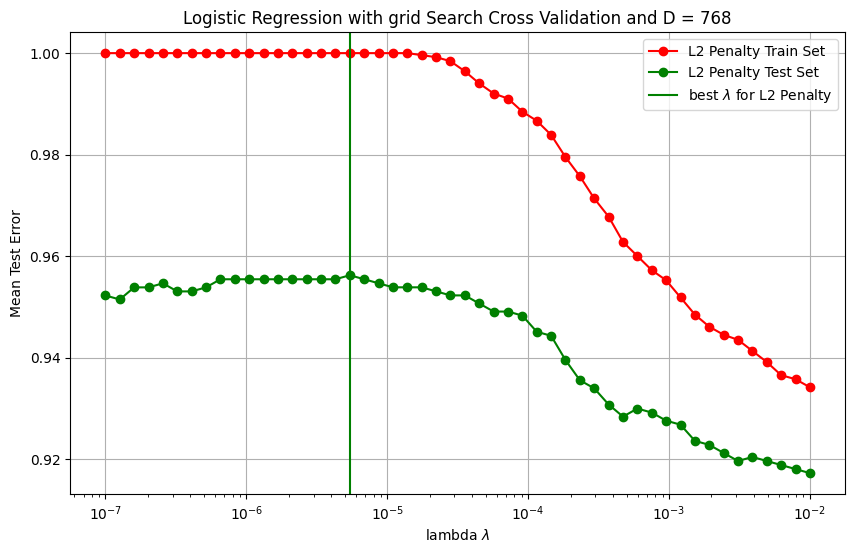

LogisticRegression(C=3906939.9370546215, solver='liblinear')
The accuracy on the Test set is : 95.92593%


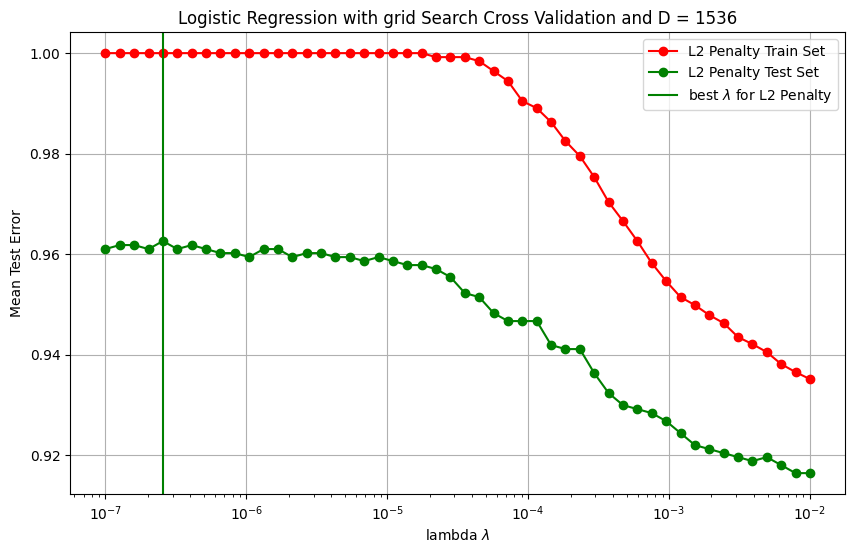

In [22]:
d = x_train.shape[1]

D_new = [3*d, 6*d, 12*d, 24*d]
lambda_ = np.logspace(-7,-2,50)

for D in D_new:
    F = np.random.normal( loc = 0, scale = 1/np.sqrt(d), size = (D,d))
    u_train = 1/np.sqrt(D) * sigmoid(F@x_train.T).T
    u_test = 1/np.sqrt(D) * sigmoid(F@x_test.T).T

    log_reg_l2 = LogisticRegression(penalty = 'l2',solver = 'liblinear')

    parameters_logregl2 = {'C' :  1/(lambda_)}
    
    folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
    cv_logregl2 = GridSearchCV(log_reg_l2, parameters_logregl2, scoring = 'accuracy', cv = folds, return_train_score = True)
    cv_logregl2.fit(u_train, y_train)

    cvopt_logregl2 = cv_logregl2.best_estimator_
    cvopt_logregl2.fit(u_train,y_train)

    accuracy_logregl2 = cvopt_logregl2.score(u_test, y_test)

    print(cvopt_logregl2)
    print(f"The accuracy on the Test set is : {accuracy_logregl2*100:.5f}%")

    mean_test_l2 = cv_logregl2.cv_results_['mean_test_score']
    mean_train_l2 = cv_logregl2.cv_results_['mean_train_score']

    plt.figure(figsize= (10,6))
    plt.semilogx(lambda_, mean_train_l2, label='L2 Penalty Train Set',  color = 'red', marker = 'o')
    plt.semilogx(lambda_, mean_test_l2, label='L2 Penalty Test Set',  color = 'green', marker = 'o')
    plt.axvline(1/cv_logregl2.best_params_['C'], color = 'green', label = 'best $\lambda$ for L2 Penalty')
    plt.xlabel('lambda $\lambda$')
    plt.ylabel('Mean Test Error')
    plt.legend()
    plt.title('Logistic Regression with grid Search Cross Validation and D = '+str(D))
    plt.grid()
    plt.show()

*We see clearly that increasing the $D$ value we have always an increase of the accurracy too, but after a moment increasing to much don't lead to a big gain of accuraccy*

**Part 2 : Statistical Learning with Nearest-Neighbors**

*1) Show the best estimator*

First, reading the exercise instruction wesee for this exercice that a "genie" knows the distribution $\mathbb{P}(X,Y)$. We can follow the steps that we did during the lecture 3. 

Our goal is to minimize the expected population risk 
$\begin{equation}
\mathbb{E}_{X,Y} \left[(f(\textbf{X})-Y)^2 \right] 
\end{equation}$
So furthemore we can rewrite this equation knowing that :
$f(\textbf{X}) = \hat{y}(x)$ and $y(x) = Y$

So then we have : 
$\begin{equation}
\mathbb{E}_{X,Y} \left[(f(\textbf{X})-Y)^2 \right]  = \mathbb{E}_{X,Y} \left[(\hat{y}(x) - y(x))^2 \right] = \mathbb{E}_{X,Y} \left[(\hat{Y} - Y)^2 \right] 
\end{equation}$

Then using the law of the total expectation $\mathbb{P}(x,y) = \mathbb{P}(x)\cdot \mathbb{P}(y | x)$ we have :

$\begin{equation}
\mathbb{E}_{X,Y} \left[(\hat{Y} - Y)^2 \right] = \mathbb{E}_X \left[\mathbb{E}_{Y|X} \left[(\hat{Y} - Y|X)^2 \right] \right]
\end{equation}$

And now we want to find $\hat{y}$ that minimizes this last equation. 

We differentiate now $\mathbb{E}_{Y|X} \left[(\hat{Y} - Y|X)^2 \right]$ in function of $\hat{y}$

$\begin{equation}
\frac{\partial}{\partial{\hat{Y}}} \left( \mathbb{E}_{Y|X}[(\hat{Y} - Y|X )^2] \right) = 2 \cdot \mathbb{E}_{Y|X}[\hat{Y} - Y|X]
\end{equation}$

And then we find the $\hat{y}$ that minimize this equaling this derivative to zero : 

$\begin{equation}
2 \cdot \mathbb{E}_{Y|X}[\hat{Y} - Y|X] = 0
\end{equation}$

And this give to us the following solution : 

$\begin{equation}
\hat{Y} = \mathbb{E}_{Y|X} [Y|X]
\end{equation}$

And we know that : $f_{Bayes}(x) = \mathbb{E}_{Y|X} \left[Y|X \right]$.

So :

$\begin{equation}
\hat{Y} = \mathbb{E}_{Y|X} [Y|X] = f_{Bayes}(x) \ \ \#
\end{equation}$

And we have the result that we were looking for $\hat{Y} = f_{Bayes}(x)$


*2) Show KNN*

We start with : 
$\begin{equation}
\Delta \mathcal{R} = \mathcal{R}_{ KNN } - \mathcal{R}_{Bayes} = \mathbb{E} _{x _i, y _i ,\textbf{X} , Y } [(Y - f_{KNN}(\textbf{X}))^2 - (Y-f_{Bayes}(\textbf{X}))^2]
\end{equation}$
So again using the law of the total expectation we have : 

$\begin{equation}
\mathbb{E} _{\textbf{X}} \left[\mathbb{E}_{Y|X,{y_i,x_i}} \left[(Y | X - f_{KNN}(\textbf{X}))^2 - (Y | X -f_{Bayes}(\textbf{X}))^2\right]\right]
\end{equation}$

$\begin{equation}
\mathbb{E}_X \left[\mathbb{E}_{Y|X,{y_i,x_i}}\left[(Y | X)^2 + \frac{1}{k^2} \sum_{i,j \in \mathcal{N}_k(\textbf{X})} y_i y_j - \frac{2}{k} \sum_{i \in \mathcal{N}_k(\textbf{X})} (Y | X) y_i \right] - \Delta(Y | X) \right] 
\end{equation}$
with $\Delta(Y | X)$ being the variance of Y(X) (as seen during the lecture) 

$ \Delta(Y | X) = \mathbb{Var} ( Y | X ) = \mathbb{E}_{Y|X} \left[( Y | X -\mathbb{E}_{Y|X} \left[ Y | X \right] )^2 \right]$

We can now use the propriety of linearity of the expectation and we distribute the expectation as follow : 


$\begin{equation}
\mathbb{E}_\textbf{X} \left[\mathbb{E}_{Y|\textbf{X}}[(Y | \textbf{X})^2] + \frac{1}{k^2} \sum_{ i \neq j} \mathbb{E}_{y_i}[y_i]\mathbb{E}_{y_j}[y_j] + \frac{1}{k^2} \sum_{ i = j} \mathbb{E}_{y_i}[y_i^2]- \frac{2}{k} \sum_{i \in \mathcal{N}_k(\textbf{X}) } \mathbb{E}_{Y|\textbf{X}}(Y | \textbf{X}) \mathbb{E}_{y_i}[y_i]  - \Delta(Y | X) \right] 
\end{equation}$



And now we want to simplify this expression and for that we know this relations : 

- if $y_i = Y | x_i$ so we have $f_{Bayes}(x_i) = \mathbb{E}_{y_i} \left[y_i \right]$
- $\mathbb{E}_{y_i} \left[y_i^2 \right] = \mathbb{Var}(x_i) + f^2_{Bayes}(x_i)$
- $f_{Bayes}(X) = \mathbb{E}_{Y|X} \left[Y|X \right]$ (from previous point 2.1)
- $\mathbb{E} \left[(Y|X)^2 \right] = \mathbb{Var}(X) + f^2_{Bayes}(X)$

All this results are taken directly form the lecture note, lectures demonstration and previous points. 

So with this now we have : 
$\begin{equation}
\mathbb{E}_\textbf{X} \left[\mathbb{Var}(X) + f^2_{Bayes}(X) + \frac{1}{k^2} \sum_{ i \neq j} f_{Bayes}(x_i)f_{Bayes}(x_j) + \frac{1}{k^2} \sum_{ i = j} (\mathbb{Var}(x_i) + f^2_{Bayes}(x_i)) - \frac{2}{k} \sum_{i \in \mathcal{N}_k(\textbf{X}) } f_{Bayes}(X) f_{Bayes}(x_i)  - \mathbb{Var}(X) \right] 
\end{equation}$

$\begin{equation}
\mathbb{E}_\textbf{X} \left[ f^2_{Bayes}(X) + \frac{1}{k^2} \sum_{ i \neq j} f_{Bayes}(x_i)f_{Bayes}(x_j) + \frac{1}{k^2} \sum_{ i = j} \mathbb{Var}(x_i) + \frac{1}{k^2} \sum_{ i = j} f^2_{Bayes}(x_i)- \frac{2}{k} f_{Bayes}(X) \sum_{i \in \mathcal{N}_k(\textbf{X}) }  f_{Bayes}(x_i) \right] 
\end{equation}$

And we have now this following equation : 
$\begin{equation}
f^2_{Bayes}(X) - \frac{2}{k} f_{Bayes}(X) \sum_{i \in \mathcal{N}_k(\textbf{X}) }  f_{Bayes}(x_i) + \frac{1}{k^2} f_{Bayes}(X)^2  = \left (\frac{1}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2 
\end{equation}$

So we have : 

$\begin{equation}
\mathbb{E}_\textbf{X} \left[ \frac{1}{k^2} \sum_{ i \neq j} f_{Bayes}(x_i)f_{Bayes}(x_j) +  \frac{1}{k^2} \sum_{ i = j} \mathbb{Var}(x_i) + \left (\frac{1}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2  \right] 
\end{equation}$

and finally we have :
$\begin{equation} 
\Delta R = \mathbb{E}_X \left(\frac{1}{k^2} \sum_{i \in \mathcal{N}_R(\vec{x})} \Delta (x_i) \right) + \mathbb{E}_X \left[\left (\frac{1}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2 \right]
\end{equation}$

And give finally to us : 

$\begin{equation} 
\Delta R = \frac{\sigma^2}{k}  + \mathbb{E}_X \left[\left (\frac{1}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2 \right]
\end{equation}$

with : 

$\begin{equation} 
v  = \frac{\sigma^2}{k} \ \ and \ \ b^2 = \mathbb{E}_X \left[\left (\frac{1}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2 \right] \ \ \#
\end{equation}$

*3) show the lead*

We want to show that our previous result : 
 $ \Delta{R} \leq L^2 \left(\frac{k}{n} \right)^{\frac{2}{d}} + \frac{\sigma^2}{k}$

 For that we will use more Assumptions : 

 1. Assume that the noise $\Delta(X)$ is homogenous 
 so that implicates that : $\Delta{R} = \frac{\Delta}{k} + b^2$

 2. We suppose that the regression function $f_{Bayes}$ is L-Lipschitz that give us : 
 $\begin{equation}
 \left (\frac{1}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2  \le \frac 1{k^2} k 
\sum_{i \in \mathcal{N}_R(\vec{x})} \left ( f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2 = \frac 1{k} 
\sum_{i \in \mathcal{N}_R(\vec{x})} \left ( f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2
\end{equation}$

And then we obtain :
$\begin{equation}
\Delta R \leq \frac{\Delta}{k} +   \frac{1}{k} 
\sum_{i \in \mathcal{N}_R(\vec{x})} \left( f_{Bayes}(x_i) - f_{Bayes}(X)\right)^2\ 
\end{equation}$ 





And with this assumption and we know from lecture that if $f_{Bayes}(X)$ is L-lipschitz so that $|{f(x) - f(y)}| \leq L {\|{x - y}\|_2}$ we have now : 
$\begin{equation}
\Delta R \leq \frac{\Delta}{k} + \frac{L^2}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} \|{x_i - X}\|^2_2 = \frac{\sigma^2}{k} + \frac{L^2}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} \|{x_i - X}\|^2_2
\end{equation}$

and now using assumption (ii) that the x1, x2, . . . , xn are are evenly spaced on a d-dimensional unit (hyper-)cube of volume 1 (as done during the lecture):

We now that density is $\rho =  \frac{n}{V_{tot}}$ Here we know that $V_{tot} = 1$ so $\rho = n$ now considering the dimension $d$ we consider a volume $l^d \cdot \rho = nl^d$ that represents the number of point in this volume. 
So now to find k points, we look to a distanc that satisfied $l^d\cdot n = k$ and then we obtain $l = \left( \frac{k}{n}\right)^{\frac{1}{d}}$
and finally in our case we have $\|{x_i - X}\|^2_2 = l^2 = \left( \frac{k}{n}\right)^{\frac{2}{d}} $

And finally the final step we compute all together and we have : 

$\begin{equation}
\Delta R \leq \frac{\sigma^2}{k} + \frac{L^2}{k} \sum_{i \in \mathcal{N}_R(\vec{x})} \|{x_i - X}\|^2_2 = \frac{\sigma^2}{k} + {L^2} \left( \frac{k}{n}\right)^{\frac{2}{d}}
\end{equation}$

So we prove that : 

$\begin{equation}
\Delta R \leq  \frac{\sigma^2}{k} + {L^2} \left( \frac{k}{n}\right)^{\frac{2}{d}}
\end{equation}$

We see that finally we have two term the biais and the variance and we have some variable that define this biais and variance and we will briefly discuss about this. 
For example k is in both of term (variance and biais) so we need to have a compromise that's call the bias-variance trade-off. For example if we increase k the first term will decrease but the first term will increase so we reduce the variance but we increase the Biais. Then if we increase L the biais will increase and the Risk will quickly because it's a square term. 
Then if we increase the number of samples (n) we will have a smaller biais and no impact on the variance, that easily imaginable more samples we have more our prediction is precise. And when we change d there is no impact in variance but the biais is changing. Increasing d means that we have more features to find neighbour.  


*4) Plot to find best k*

In [73]:
#Find Best K 
L = 1
var = 1
k = np.linspace(1,100,100)


def bias_variance_tradeoff(n, d):
    risk = []
    biais = []
    variance = []
    for k_ in k :    
        biais.append(L**2 * (k_/n)**(2/d))
        variance.append(var/k_)
        risk.append(L**2 * (k_/n)**(2/d) + var/k_)



    best_risk = min(risk)
    best_k = k[np.argmin(risk)]

    plt.figure()
    plt.plot(k,risk, label = 'Risk', color = 'red')
    plt.plot(k, biais, label = 'biais', color = 'green')
    plt.plot(k, variance, label = 'variance', color = 'orange')
    plt.title(f'Bias-variance tradeoff for n = {n} and d = {d}')
    plt.axvline(best_k,linestyle = '--')
    plt.xlabel('k')
    plt.ylabel('Risk')
    plt.legend()
    plt.show()
    print('best k is:', best_k)
    print('minimum risk is :', best_risk)









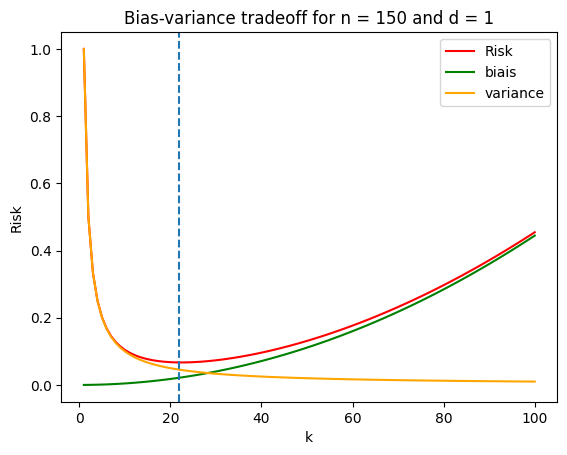

best k is: 22.0
minimum risk is : 0.06696565656565656


In [74]:
bias_variance_tradeoff(n = 150, d = 1)

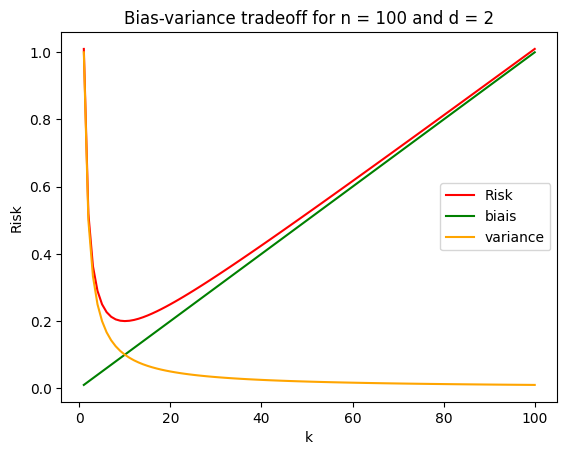

In [51]:
bias_variance_tradeoff(n = 100, d = 2)